In [45]:
from sklearn.model_selection import learning_curve
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as seabornInstance 
from sklearn import preprocessing
from scipy.special import expit
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [2]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [3]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}
data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,1977,47,0.702,0.434,5,-9.866,1,0.0387,0.112,0.000462,0.191,0.699,135.934,4
1,1984,15,0.263,0.885,0,-5.594,1,0.0408,0.858,0.094200,0.359,0.819,172.135,4
2,1968,28,0.377,0.396,3,-8.588,1,0.0306,0.605,0.000000,0.292,0.410,83.445,4
3,1985,13,0.668,0.484,5,-13.837,1,0.0334,0.565,0.000317,0.191,0.682,122.258,4
4,1973,21,0.457,0.461,7,-10.270,1,0.0662,0.133,0.003420,0.154,0.339,78.341,4


In [5]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data,test_data = np.split(data.sample(frac=1), [int(.8*len(data))])

In [6]:
# Split output and convert to array
train_output = train_data.Popularity
train_output = np.asarray(train_output,dtype=np.float64)
train_output_norm = train_data.Popularity
train_output_norm = np.asarray(train_output_norm,dtype=np.float64)
train_data = train_data.drop(['Popularity'], axis=1)
train_data_norm = train_data
train_data = np.asarray(train_data,dtype=np.float64)
train_data_norm = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])
training_count_norm = len(train_data[:,0])

test_output = test_data.Popularity
test_output = np.asarray(test_output,dtype=np.float64)
test_output_norm = test_data.Popularity
test_output_norm = np.asarray(test_output_norm,dtype=np.float64)
test_data = test_data.drop(['Popularity'], axis=1)
test_data_norm = test_data
test_data = np.asarray(test_data,dtype=np.float64)
test_data_norm = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])
test_count_norm = len(test_data[:,0])

In [7]:
print(training_count)
print(test_count)

48835
12209


In [9]:
# normalized the dataset
min_max_scaler = preprocessing.MinMaxScaler()

train_data_norm = min_max_scaler.fit_transform(train_data_norm)

test_data_norm = min_max_scaler.fit_transform(test_data_norm)

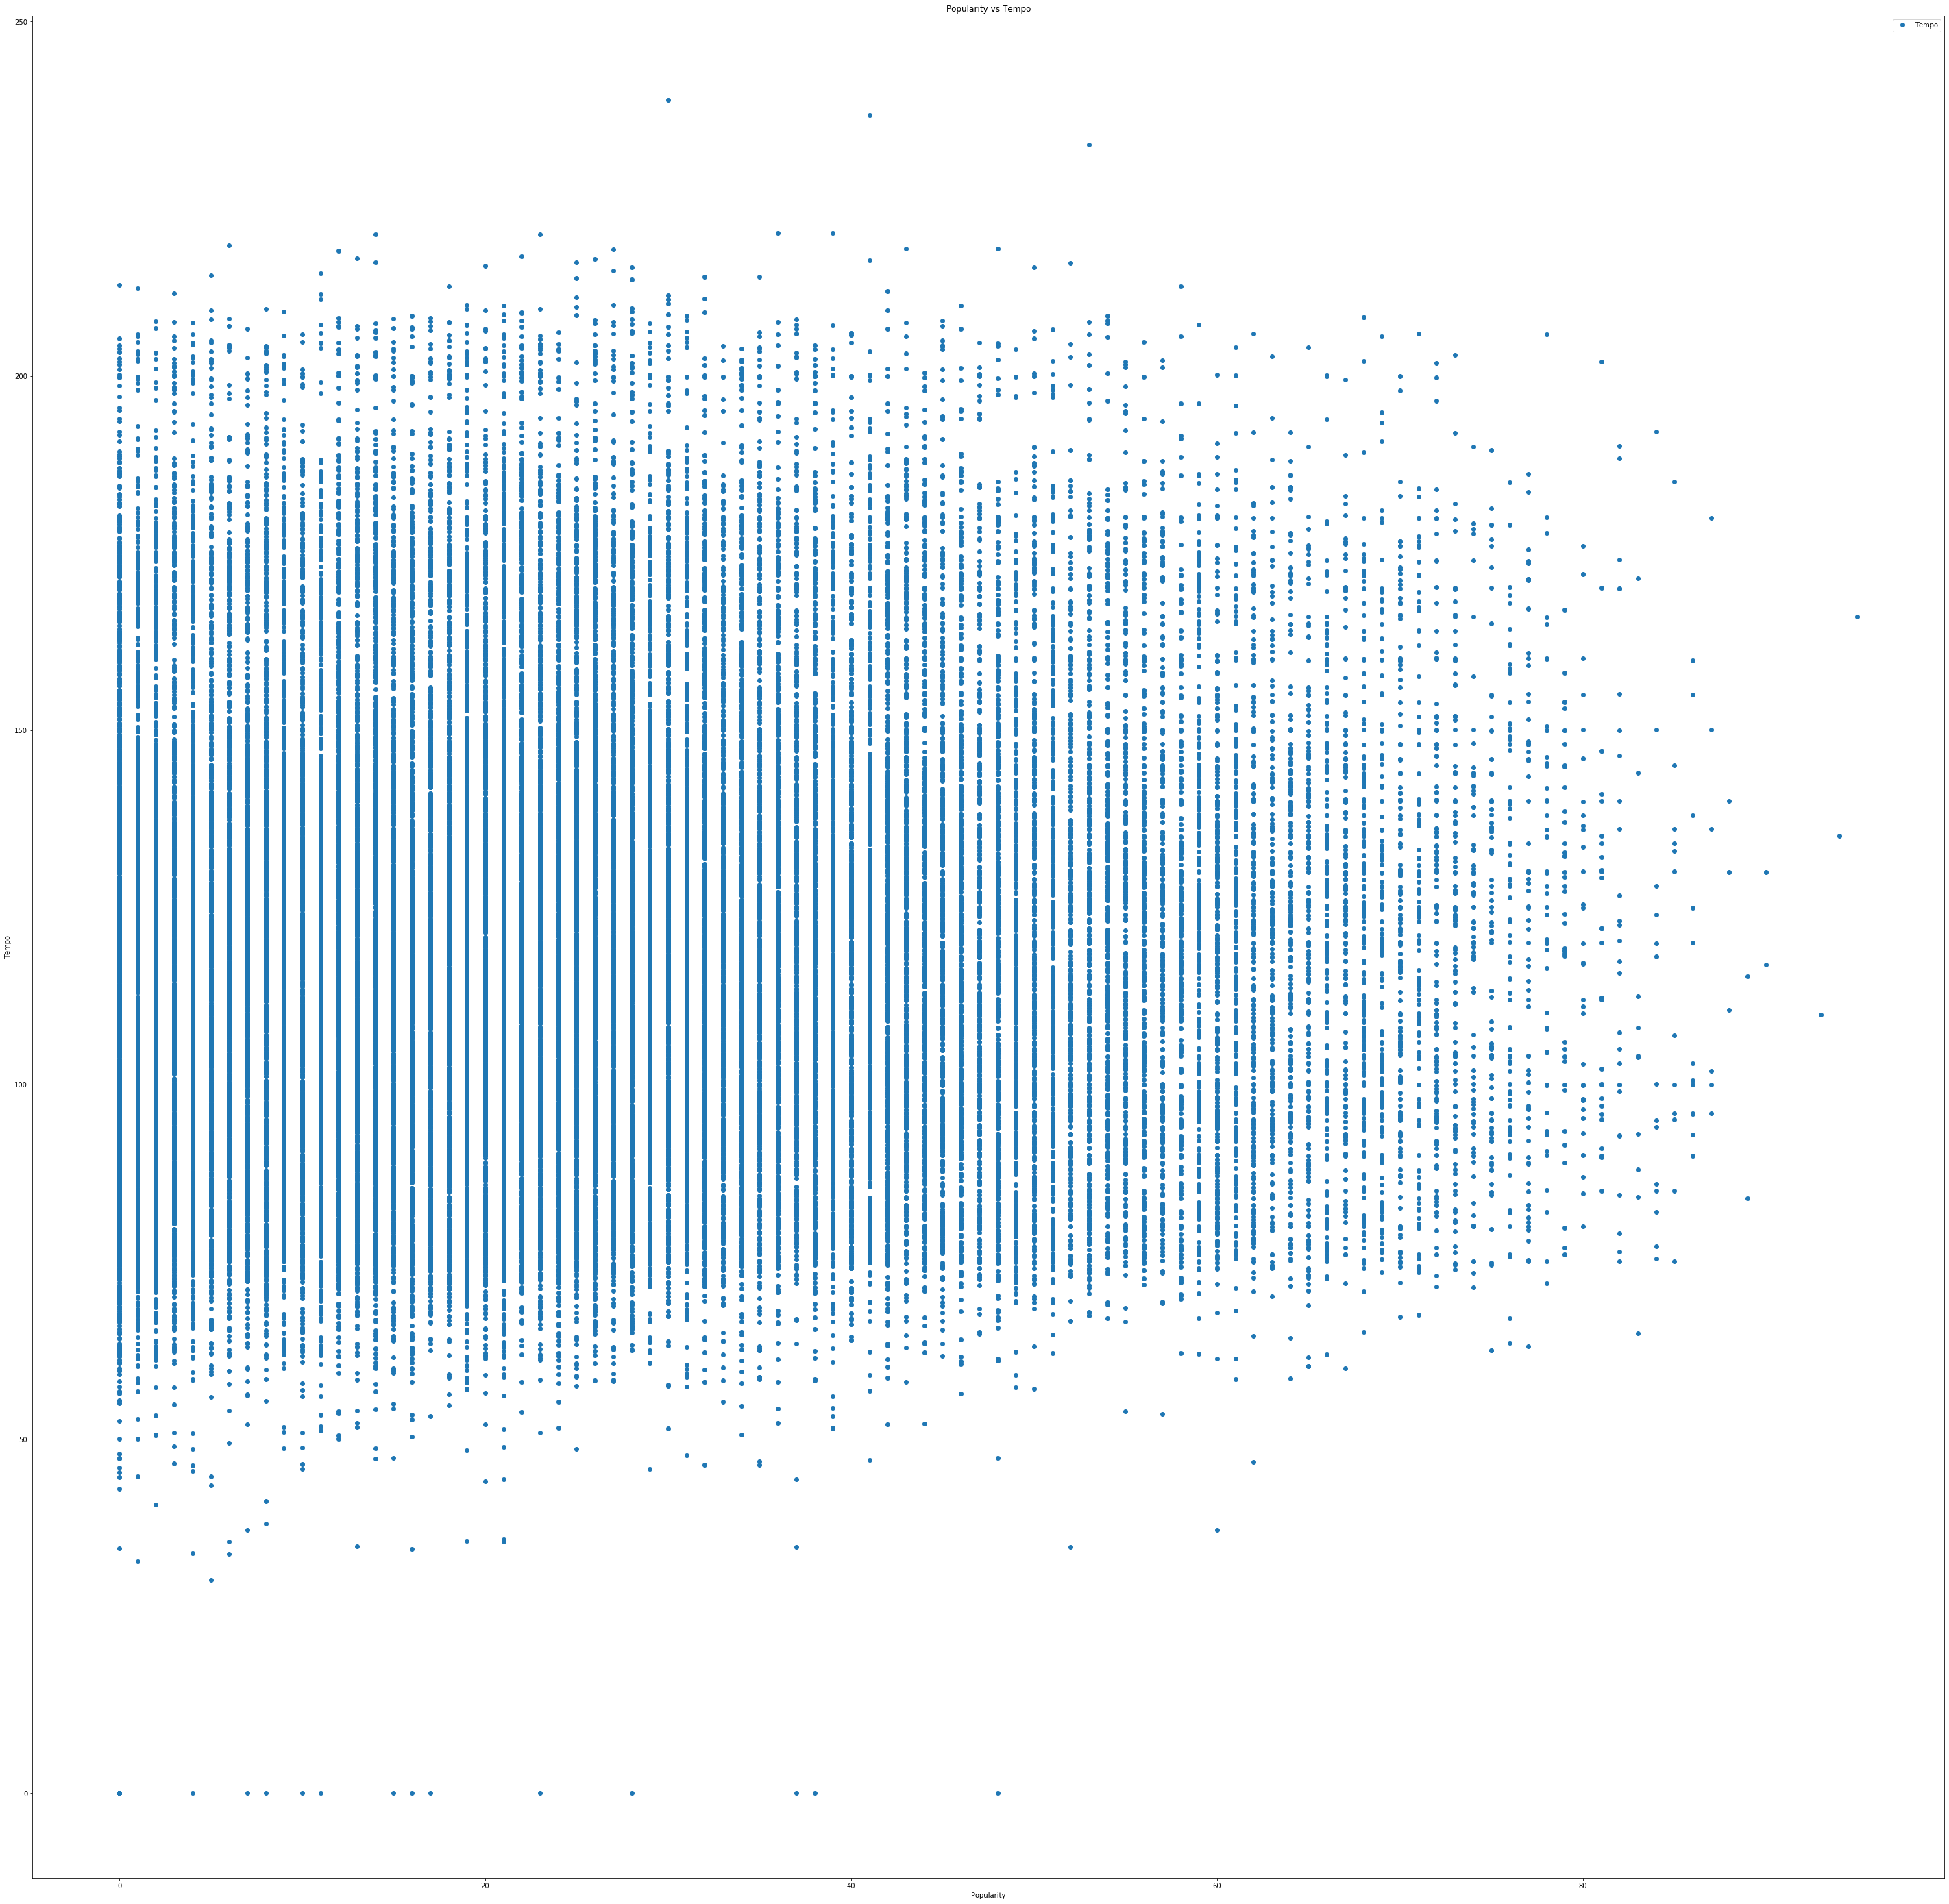

In [17]:
data.plot(x='Popularity', y='Tempo', style='o',figsize=(50,50))  
plt.title('Popularity vs Tempo')  
plt.xlabel('Popularity')  
plt.ylabel('Tempo')  
plt.show()

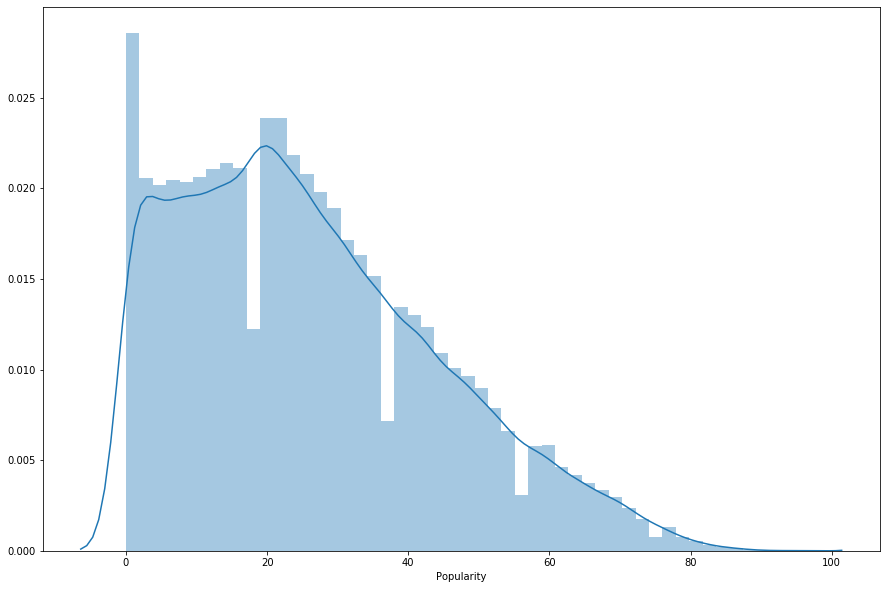

In [21]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Popularity'])

In [23]:
reg = LinearRegression().fit(train_data,train_output)
reg_norm = LinearRegression().fit(train_data_norm,train_output)

In [24]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print(reg.score(test_data,test_output))
print(reg_norm.score(test_data_norm,test_output))

0.11435190974600296
0.11146692264390101


In [25]:
# Make predictions using the testing set
test_data_pred = reg.predict(test_data)

In [26]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_output, test_data_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_output, test_data_pred))

Coefficients: 
 [-6.46266261e-03  1.32352008e+01 -4.57643011e+00  4.48176167e-02
  7.67834837e-01 -5.01321483e-01  3.53312125e+00 -9.09698590e+00
 -4.86632442e+00 -7.87711886e+00 -9.86365418e+00  1.58628433e-02
  8.23590697e-01]
Mean squared error: 297.99
Coefficient of determination: 0.11


In [30]:
df_res = pd.DataFrame({'Actual': test_output.flatten(), 'Predicted': test_data_pred.flatten()})
df_res

,Actual,Predicted
0,48.0,27.237121
1,34.0,28.739720
2,40.0,32.783532
3,19.0,29.173668
4,45.0,35.667818
...,...,...
12204,17.0,27.736982
12205,35.0,26.432954
12206,31.0,32.111586
12207,15.0,19.714582


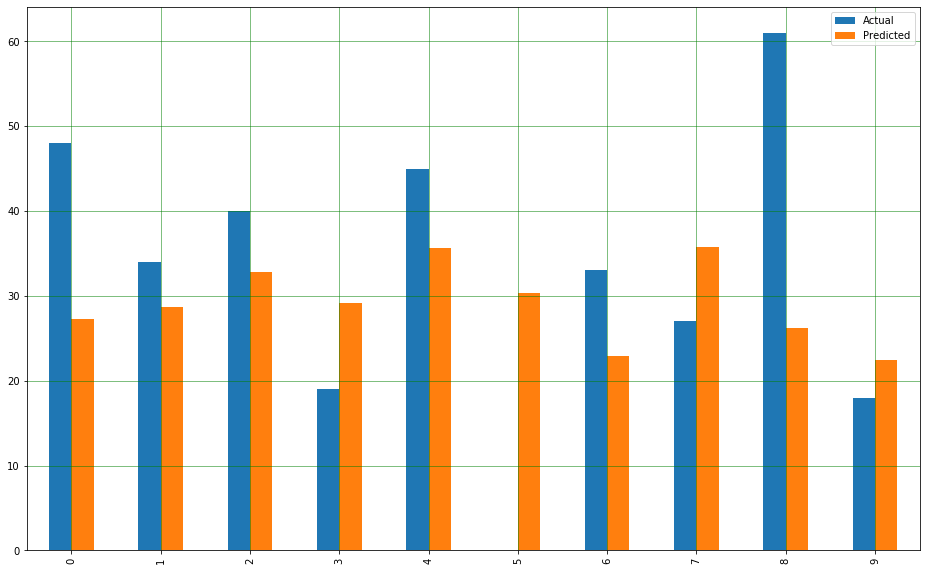

In [32]:
df1 = df_res.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [47]:
# Another penalization approach, called Lasso (least absolute shrinkage and selection operator), 
# can set some coefficients to zero. 
# Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: 
# prefer simpler models.

alphas = np.logspace(-4, -1, 6)
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
          .fit(train_data, train_output)
          .score(test_data, test_output) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
y_pred = regr.fit(test_data, test_output)
print(regr.coef_)
print(best_alpha)
print('Mean Squared Error:', np.mean((regr.predict(test_data) - test_output)**2))  
print('Root Mean Squared Error:', np.sqrt(np.mean((regr.predict(test_data) - test_output)**2)))

[ -0.023513    13.44471431  -2.82101365   0.04056017   0.75993453
  -0.51943855   1.65630005  -8.59382766  -5.14707099  -6.96128808
 -11.07363649   0.01415856   0.47166   ]
0.00630957344480193
Mean Squared Error: 297.69075417598583
Root Mean Squared Error: 17.253717111856965


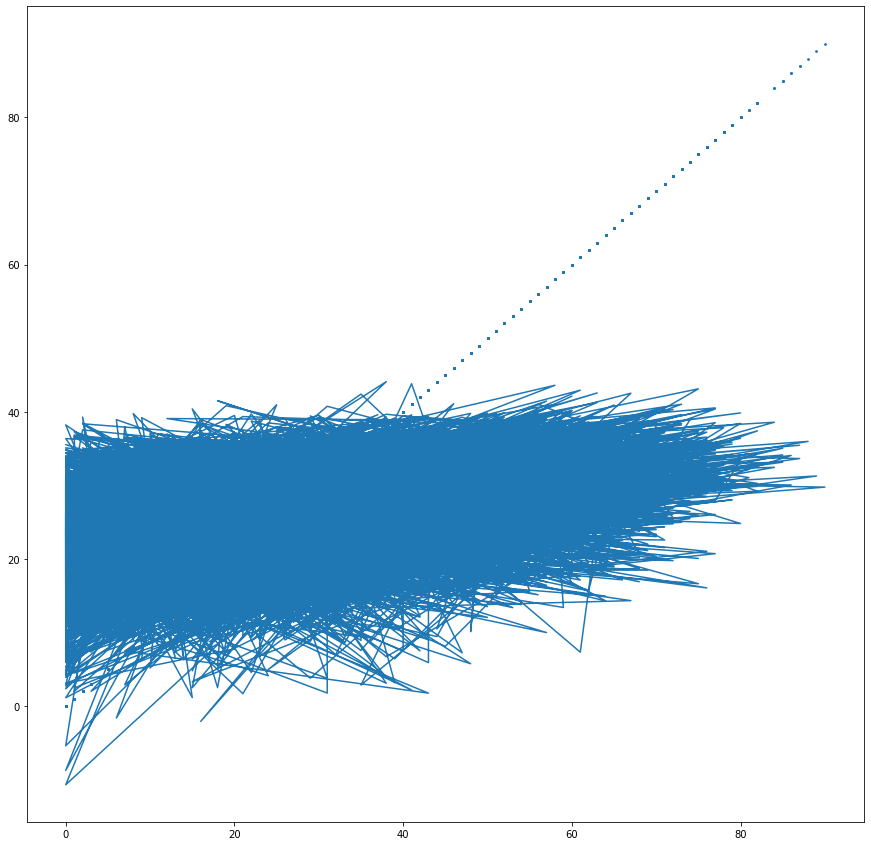

In [56]:
regr = linear_model.Ridge(alpha=.1)
regr.fit(train_data, train_output)
plt.figure(figsize=(15,15))
plt.plot(test_output, regr.predict(test_data)) 
plt.scatter(test_output, test_output, s=3) 